# **final project**



In [1]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = ('/content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/final_project')


Mounted at /content/drive


## video to img.

כדי להשתמש בקוד הזה יש צורך להעלות לדרייב את הסרטון הרצוי ואז להעתיק את הנתיב של הסרטון למטה איפה שכתוב שנה נתיב סרטון.

לאחר מכן יש צורך לכתוב נתיב של היעד איפה שכתוב שם התיקיה שבה ישמרו התמונות

In [3]:
import os
from moviepy.editor import VideoFileClip

def extract_frames(video_path, output_folder, frame_rate=1):

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    try:
        clip = VideoFileClip(video_path)
        duration = clip.duration

        for second in range(int(duration)):
            if second % (1/frame_rate) == 0:
                frame = clip.get_frame(second)
                frame_filename = os.path.join(output_folder, f"frame_{second:04d}.jpg")
                clip.save_frame(frame_filename, t=second)

        clip.close()
        print(f"תמונות חולצו בהצלחה לתיקייה: {output_folder}")

    except Exception as e:
        print(f"שגיאה: {e}")

if __name__ == "__main__":
    video_path = f"{folder_path}/tardigrades_1.mp4"  # שנה לנתיב הסרטון
    output_folder = f"{folder_path}/output_frames"  # שם התיקייה שבה יישמרו התמונות
    frame_rate = 1 # תמונה לשנייה

    extract_frames(video_path, output_folder, frame_rate)

תמונות חולצו בהצלחה לתיקייה: /content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/final_project/output_frames


## יצירת גרף שינוי הצבע של הדובונים

לעבור על כל תמונה ולזהות בעזרת סגמנטציה את הדובון בכל תמונה

על כל דובון כזה שזוהה בכל תמונה יש לחשב את הממוצע של ערכי הפיקסלים בדובון של כל תמונה

כל ממוצע של כל תמונה נשמר כערך ואז כל הערכים יחד עוברים פלט בגרף

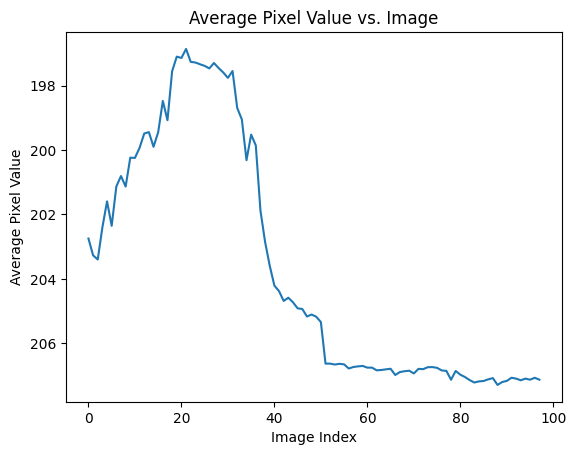

In [4]:
import os
import glob
import numpy as np
import cv2
import imutils
from skimage import io
import matplotlib.pyplot as plt

images_path = f"{output_folder}"
image_files = glob.glob(os.path.join(images_path, '*.jpg'))

average_pixel_values = []

for image_file in image_files:
    img = io.imread(image_file, as_gray=False)

    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold the grayscale image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # find contours in the thresholded image and grab the largest one
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [c], -1, 255, -1)

    # apply the mask to the original image
    segmented_image = cv2.bitwise_and(img, img, mask=mask)

    object_pixels = img[mask == 255]
    average_pixel_value = np.mean(object_pixels)

    average_pixel_values.append(average_pixel_value)

plt.plot(average_pixel_values)
plt.xlabel('Image Index')
plt.ylabel('Average Pixel Value')
plt.title('Average Pixel Value vs. Image')

# Invert y-axis
plt.gca().invert_yaxis()

plt.show()

In [5]:
print(average_pixel_values)

[202.7465169986093, 203.26943252368628, 203.39844906565972, 202.40081705729168, 201.59244180747314, 202.35258616573856, 201.13010647798012, 200.80710882423472, 201.13419596822175, 200.23703950459478, 200.24412290219908, 199.9310080295139, 199.4879761515945, 199.4441248308646, 199.89932255497686, 199.44787664338466, 198.47499798357708, 199.0732697554287, 197.5533552734613, 197.10073108441597, 197.141845703125, 196.86104585616954, 197.26280815972223, 197.28266879919445, 197.33724430651932, 197.38747509294595, 197.46642968698572, 197.29781607835946, 197.45562779722468, 197.59159416578595, 197.75965251698406, 197.54726050189169, 198.69262183757257, 199.050550546749, 200.31511427421253, 199.5213276056072, 199.8553074363426, 201.87869212962963, 202.853505859375, 203.59241066261575, 204.20917643229166, 204.38082139756943, 204.68452546296297, 204.58479636863427, 204.72684714988426, 204.91446460626224, 204.93346788194444, 205.16679832175927, 205.10708658854168, 205.17418511284723, 205.339269393